### Aprendizagem Automática Avançada
### Assignment 2 - SVM

#### Beltrán Liniers  nº57646

#### Luís Santos nº57470

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import pandas as pd
import random
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
import seaborn as sns
sns.set()
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics

In [207]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target


In [102]:
def plot_svc(models,X):
    colors = ['blue','yellow','brown']
    plt.subplot(1,1,1)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    for i, model in enumerate(models):
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(colors))
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.xlim(xx.min(), xx.max())
        plt.title('SVC with poly kernel')
        plt.show()

### Problem 4

O primeiro passo é construir um modelo SVM que nos ajude a classificar as nossas observações segundo a sua espécie. Neste modelo foi aplicado um kernel polinómico como objetivo de otimizar a classificação, sendo que os pontos não são linearmente separáveis. 


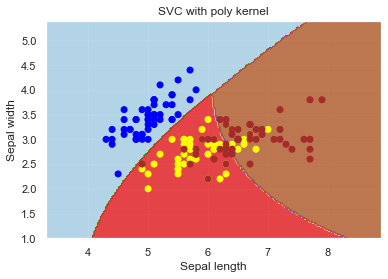

In [103]:
svc_poly3 = svm.SVC(kernel='poly',degree=3, C=1).fit(X,y)
plot_svc([svc_poly3],X)

Analisando o gráfico, destaca-se que o decision boundary obtido permite classificar corretamente todas os exemplos de classe setosa, identificados a azul. Por outro lado, para os pontos de classe versicolor e virginica, o decision boundary não conseguiu efetuar uma boa separação. É possível afirmar que a utilização somente destas duas dimensões, sepal width e sepal length, leva a que os pontos das classes referidas estejam localizados com grande proximidade. Dificultando a tarefa de encontrar um decision boundary capaz de realizar uma separação adequada.

No passo a seguir, decidiu-se retirar 15 observações ao acaso. Com intuito de estudar a mudança do decision boundary.  

In [10]:
#Remove some support vectors
spv_rm = random.sample(list(svc_poly3.support_),15)
X_rm_spv = np.delete(X,spv_rm,0)
y_rm_spv = np.delete(y,spv_rm,0)
y[spv_rm]

array([1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2])

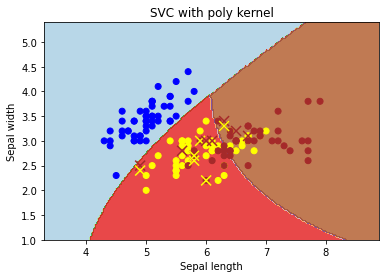

In [31]:
plt.subplot(1,1,1)
colors = np.array(['blue','yellow','brown'])
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svc_poly3.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired,  alpha=0.8)
plt.scatter(X_rm_spv[:, 0], X_rm_spv[:, 1], c=y_rm_spv, cmap=ListedColormap(colors))
#Plot support vectors to be removed
plt.scatter(X[spv_rm, 0], X[spv_rm, 1], c=y[spv_rm], s=100, cmap=ListedColormap(colors[np.unique(y[spv_rm])]), marker='x')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with poly kernel')
plt.show()

Assim, os support vectors removidos foram identificados com o marcador 'X'. De forma a facilitar a posterior análise ao comportamento do decision boundary. Tendo sido assim treinado um modelo com os mesmos hiperparâmetros mas com o novo dataset sem esses pontos.

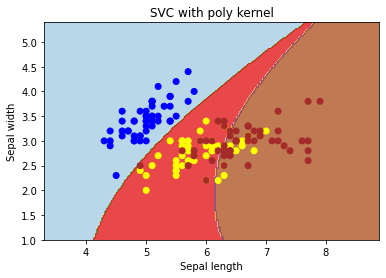

In [32]:
svc_rm_spv = svm.SVC(kernel='poly',degree=3,C=1).fit(X_rm_spv,y_rm_spv)
plot_svc([svc_rm_spv],X)

Como seria de esperar, a remoção de alguns support vectors teve impacto no híperplano, dado que são estes os elementos que definem a posição do mesmo.

Analisando o gráfico, é possível observar que a remoção dalguns support vectors, alterou significativamente as áreas de classificação das classes versicolor e virginica. Isto deve-se ao facto de que todos os support vectors removidos pertenciam a uma destas classes. Por outro lado, a mudança do híperplano não afetou a área de decisão para os pontos de classe setosa. Onde é possível continuar a classificar todos corretamente.


### Problem 5

Neste problema o pedido era otimizar os híperparâmetros C e gamma. Para isso, vamos ‘afinar’ estes parâmetros. Pelo que se pode considerar que o híperparâmetro C gere o erro. De maneira a que um C com baixo valor, admite uma quantidade elevada de pontos mal classificados em troca de um decision boundary com margens largas [1]. Por outro lado, o gamma define a influência que cada ponto possuí. Pelo que um valor grande para gamma, menor será essa influência [2]. Valores elevados para ambos os parâmetros, maior será a probabilidade de o modelo occorer em overfitting. 

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
svc_base = svm.SVC(kernel='poly',degree=2, C=1, gamma = 0.1 )

Como primeiro passo, recorreu-se à função do scikit learn *train_test_split* para definir o training e o test set. Neste caso definiu-se o tamanho do test set como 30% do dataset total, pelo que o training set terá um tamanho de 70%.

Novamente treinou-se um modelo, com o poly kernel. Com os híperparâmetro C = 1 e Gamma = 0.1.


In [215]:
svc_base.fit(X_train,y_train)
print("Acc score sobre o train: ",svc_base.score(X_train,y_train))
print("Acc score sobre o test: ",svc_base.score(X_test,y_test))

Acc score sobre o train:  0.8095238095238095
Acc score sobre o test:  0.8


O modelo obteve um score no test set de 0.8, sendo considerado um bom score. Assim, 80% dos casos do conjunto de dados de validação foram bem situados. Mas como não foi realizado nenhum tipo de otimização, espera-se com esse processo melhorar a performance do modelo. De salientar, que a proximidade dos scores entre training e test set, pode indicar underfitting, reforçando a importância de realizar a sua otimização.

Para encontrar o melhor modelo, realizou-se um tipo de busca intensiva, denominado de Grid Search. Este método testa todas as combinações de valores para os híperparâmetros que se deseja otimizar. Tendo sido, definido para o parâmetro C um conjunto de 10 valores que variam entre 1 e 100. De igual modo para o parâmetro gamma definiu-se um intervalo de 5 valores que este pode assumir, entre 0.01 e 1. Por se tratar de um método computacionalmente intensivo. Foi tido em atenção a não definição de quantidades elevadas de valores a testar nos parâmetros

In [210]:
model = svm.SVC(kernel='poly',degree=2)
param_grid = { 'C':np.linspace(1,100,10),
                    'gamma':np.linspace(0.01,1,5) }

#Perform GridSearch with cross validation and find optimal C and gamma
grid= GridSearchCV(model,param_grid,cv=5) #k-folds = 5
grid.fit(X_train, y_train)
optimal_C = grid.best_params_['C']
optimal_gamma = grid.best_params_['gamma']
train_scores = grid.cv_results_['mean_test_score']

In [199]:
def plot_hyperparameters(train_scr,hypr,title,hue=None):
    #Plot mean accuracy score
    sns.lineplot(data = train_scr,x=hypr,y='mean_test_score',hue=hue,palette='viridis',ci=None)
    
    plt.title(title)
    plt.ylabel("Mean Acc Score") 
    
    plt.xlabel(hypr)
    plt.show()

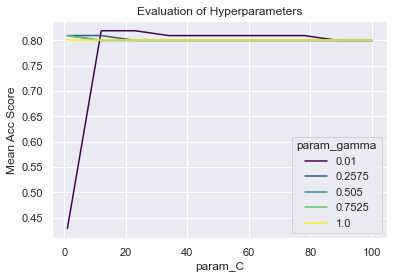

Best C: 12.0
Best gamma: 0.01


In [212]:
df = pd.DataFrame(grid.cv_results_)
plot_hyperparameters(df,'param_C','Evaluation of Hyperparameters','param_gamma')
print("Best C: {}\nBest gamma: {}".format(optimal_C,optimal_gamma))

Ao analisar o gráfico referente à otimização dos híperparâmetros, é possível concluir que para todos os valores de C (a partir de 12) com a gamma igual a 0.01, se registaram as melhores accuracy médias (linha roxa). Sendo que quando C > 20 o nível de accuracy vai diminuindo. Tal comportamento poderá dever-se ao overfitting.

Finalmente concluiu-se que os valores ótimos de C e Gamma são, respetivamente, 12 e 0.01 .


In [216]:
svc_opt = svm.SVC(kernel='poly',degree=2,C=optimal_C,gamma=optimal_gamma)
svc_opt.fit(X_train,y_train)
print("Acc score sobre o train: ",svc_opt.score(X_train,y_train))
print("Acc score sobre o test: ",svc_opt.score(X_test,y_test))

Acc score sobre o train:  0.8095238095238095
Acc score sobre o test:  0.8222222222222222


Com os híperparâmetros optimizados verifica-se uma melhor accuracy score no test set do que com os híperparâmetros originais. No entanto esta melhoria é apenas cerca de 0.02. Não sendo considerada muito significativa. De igual modo, com o modelo otimizado o score no training set manteve-se inalterado. Como tal, obteve-se uma melhor classificação no test set que no training set. 

### Problem 6

#### a)

No problema 6 foi apresentado um novo dataset que consiste em duas séries de pontos divididas em duas categorias não linearmente separáveis: azul e vermelha. O primeiro objetivo, é conseguir tornar este dataset não linearmente separável, em linearmente separável. Como tal, será necessário aumentar uma dimensão para assim encontrar um híperplano que separe ambas as categorias.

In [220]:
points_df = pd.read_csv('points.csv')

Text(0.5, 1.0, 'Dataset')

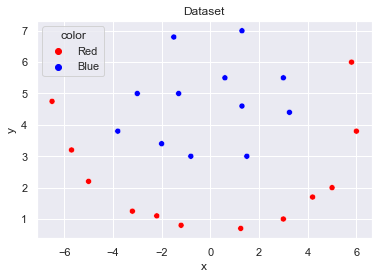

In [221]:
scplot = sns.scatterplot(data=points_df,x='x',y='y',hue='color',palette=['red','blue'])
scplot.set_title('Dataset')

In [222]:
z = np.power(points_df['x'].values,2)
points_df['z'] = z
points_df=points_df.reindex(columns=['x','y','z','color'])


Analisando o gráfico, é possível de observar que não é possível separar linearmente os exemplos. Contudo, estes não são linearmente separáveis, sendo fácil de identificar que o decision boundary, em duas dimensões, será um híperplano definido por algo semelhante a uma parábola com uma concavidade virada para cima. Pelo que a feature adicional a qual denominou-se de Z, será definida como, $Z=X^2$. 

Contudo, não se deixou de testar outras possíveis transformações, como $X\times Y$ e com $\sqrt X$. No entanto, $X^2$, revelou-se a melhor transformação, tal como será possível de visualizar no 3D scatterplot, abaixo apresentado.

#### b)

No gráfico 3D a seguir vê-se a representação do novo espaço. Conseguiu-se criar duas regiões diferenciadas na qual seria possível traçar um híperplano, capaz de identificar corretamente a maioria das classes dos data points.

<IPython.core.display.Javascript object>


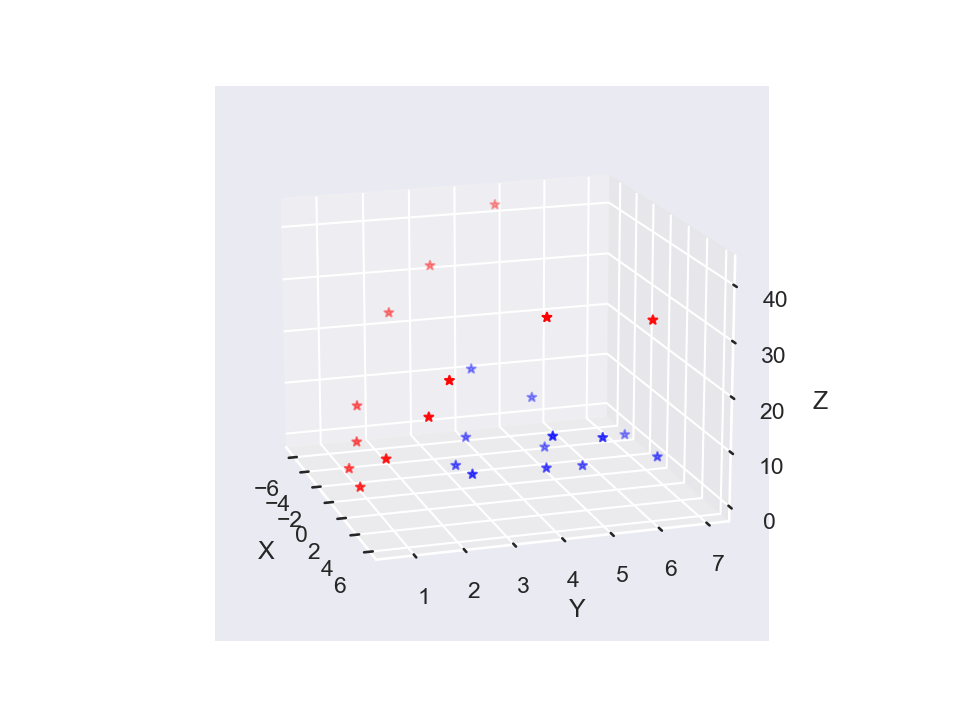

In [14]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax.scatter3D(points_df['x'],points_df['y'],points_df['z'],marker='*',c=points_df['color'])


#### c)

Agora será realizado treinado e otimizado um modelo de maneira a encontrar o melhor kernel e os seus respetivos híperparâmetros.

In [223]:
%matplotlib inline
matrix = points_df.values
x_points = matrix[:,:-2]
y_points = matrix[:,-1]
le = preprocessing.LabelEncoder()
le.fit(y_points)
y_points = le.fit_transform(y_points)

In [224]:
X_train, X_test, y_train, y_test = train_test_split(x_points,y_points,test_size=0.25,random_state=42)


model = svm.SVC()
param_grid = {
        'C':np.linspace(1,20,10),
        'gamma':np.linspace(0.01,1,5),
        'degree':np.linspace(1,5,5),
        'kernel':['poly','rbf','sigmoid']
        }



#Perform GridSearch and find optimal C and gamma
grid= GridSearchCV(model,param_grid,cv=5)
grid.fit(X_train, y_train) ############################ train ou test ?????
optimal_C = grid.best_params_['C']
optimal_gamma = grid.best_params_['gamma']
optimal_kernel = grid.best_params_['kernel']
optimal_degree = grid.best_params_['degree']
train_scores = grid.cv_results_['mean_test_score']


df = pd.DataFrame(grid.cv_results_)
#print("Best C: {}\nBest gamma: {}\nBest degree: {}".format(optimal_C,optimal_gamma, optimal_degree))

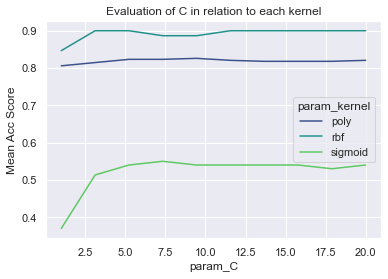

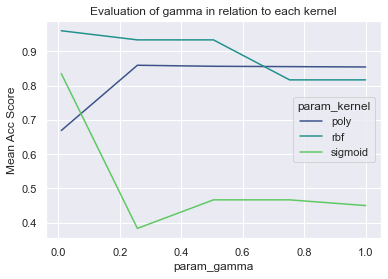

In [225]:
plot_hyperparameters(df,'param_C','Evaluation of C in relation to each kernel','param_kernel')
plot_hyperparameters(df,'param_gamma','Evaluation of gamma in relation to each kernel','param_kernel')

Ambos os gráficos ilustram os accuracy scores médios obtidos para parâmetro com cada kernel. Assim, identifica-se que em ambos os casos, o kernel rbf, foi o que apresentou a melhor performance, seguido do poly e por fim o sigmoid.

In [138]:
#Definição de uma nova função para plots do svc com alterações em relação há primeira
def plot_svcs(model,x_points,y_points,title):
    colors = ['blue','red']
    plt.subplot(1,1,1)
    x_min, x_max = x_points[:, 0].min() - 1, x_points[:, 0].max() + 1
    y_min, y_max = x_points[:, -1].min() - 1, x_points[:, -1].max() + 1
    h = abs((x_max / x_min)/100)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    le = preprocessing.LabelEncoder()
    le.fit(Z)
    Z = le.fit_transform(Z)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ListedColormap(['lightblue','orange']), alpha=0.8)
    plt.scatter(x_points[:, 0], x_points[:, 1], c=y_points, cmap=ListedColormap(colors))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim(xx.min(), xx.max())
    plt.title(title)
    plt.show()

In [226]:
svc_final_rbf= svm.SVC(kernel=optimal_kernel,C=optimal_C, gamma = optimal_gamma).fit(X_train,y_train)

print("Acc score sobre o train: ",svc_final_rbf.score(X_train,y_train))
print("Acc score sobre o test: ",svc_final_rbf.score(X_test,y_test))

Acc score sobre o train:  1.0
Acc score sobre o test:  0.8333333333333334


Assim, testando o modelo com os híperparâmetros otimizados e selecionados, obteve uma accuracy de 0.83.

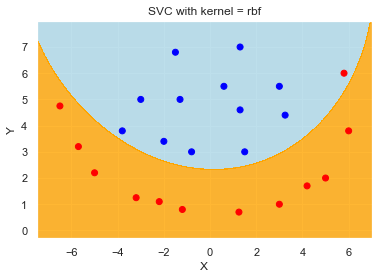

In [227]:
plot_svcs(svc_final,x_points,y_points,'SVC with kernel = rbf')

Fazendo um plot do decision boundary obtido com este modelo, rapidamente se visualiza, que este híperplano é de facto semelhante a uma parábola, com concavidade virada para cima. Sendo apenas um exemplo mal classificado.

De igual modo procedeu-se às respetivas representações dos decision boundaries para os modelos que usaram os kernels, poly e sigmoid.

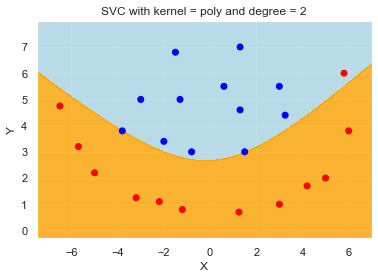

In [228]:
df_poly = df.loc[df['param_kernel'] == 'poly']

df_poly = df_poly.loc[df_poly.loc[df_poly['mean_test_score'] == df_poly['mean_test_score'].max()].index[0]]

svc_final_poly= svm.SVC(kernel='poly',C=df_poly['param_C'], gamma = df_poly['param_gamma'],degree=df_poly['param_degree']).fit(X_train,y_train)
plot_svcs(svc_final_poly,x_points,y_points,'SVC with kernel = poly and degree = 2')

O híperplano obtido com o modelo treinado com o poly kernel e um grau 2, foi obtido um híperplano também semelhante a uma parábola. Como tal a performance deste modelo foi similar à performance do modelo treinado com um rbf kernel. Tendo este classificado incorretamente 2 pontos.

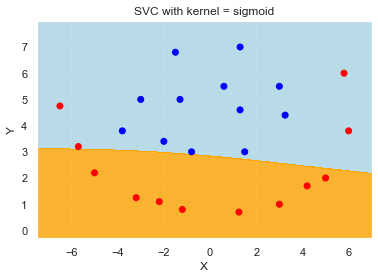

In [229]:
df_sigmoid = df.loc[df['param_kernel'] == 'sigmoid']

df_sigmoid = df_sigmoid.loc[df_sigmoid.loc[df_sigmoid['mean_test_score'] == df_sigmoid['mean_test_score'].max()].index[0]]

svc_final_sigmoid= svm.SVC(kernel='sigmoid',C=df_sigmoid['param_C'], gamma = df_sigmoid['param_gamma'],).fit(X_train,y_train)
plot_svcs(svc_final_sigmoid,x_points,y_points,'SVC with kernel = sigmoid')

O modelo treinado com o sigmoid kernel, tal como já analisado anteriormente, foi o que obteve pior resultados, sendo que o gráfico do seu decision boundary é similar a uma linha reta. Tendo classificado incorretamente 4 exemplos.

Conclui-se que o kernel mais adequado para este conjunto de dados é o rbf kernel . No entanto, o poly kernel também demonstrou resultados positivos.

### Referências

[1] Hyperparameter Tuning for Support Vector Machines — C and Gamma Parameters. (2022). Retrieved 12 March 2022, from https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167

[2] 1.4. Support Vector Machines. (2022). Retrieved 12 March 2022, from https://scikit-learn.org/stable/modules/svm.html#svm-kernels